# Eye vs. Nose

Ejemplo básico de CNN en la que se reconocen imágenes de 32x32 pixeles que contienen una nariz o un ojo (de la base de datos AR). Este es quizás uno de los ejemplos más simples para entrenar una CNN ya que la diferencia existente entre las clases es enorme, y su entrenamiento es muy rápido y efectivo. Se presenta sólo con fines pedagógicos. Se recomienda entender y probar esta red antes probar problemas de mayor complejidad.

In [ ]:
import torch
import torchvision
from   torchvision import transforms
from   torchvision.datasets import ImageFolder
from   torch.utils.data.dataloader import DataLoader
from   torch.utils.data import random_split
from   sklearn.metrics import confusion_matrix, accuracy_score

#train and test data directory
train_dir = "eyenose/train"
test_dir  = "eyenose/test"

#load the train and test data
train_set = ImageFolder(train_dir,transform = transforms.Compose([
    transforms.Resize((32,32)),transforms.ToTensor()]))

test_set = ImageFolder(test_dir,transforms.Compose([
    transforms.Resize((32,32)),transforms.ToTensor()]))

img,_ = train_set[0]
print('Size image: '+ str(img.shape))
print('   Classes: ',train_set.classes)

Size image: torch.Size([3, 32, 32])
   Classes:  ['eye', 'nose']


In [ ]:
from cnn_utils import *
print('cnn_utils module has been loaded')

--2021-10-06 14:31:01--  https://www.dropbox.com/s/2q224dslxdiag7i/cnn_utils.py
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/2q224dslxdiag7i/cnn_utils.py [following]
--2021-10-06 14:31:01--  https://www.dropbox.com/s/raw/2q224dslxdiag7i/cnn_utils.py
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucb9ac39388755027699200694bc.dl.dropboxusercontent.com/cd/0/inline/BXjfGt9OAJyXRqPhxDmC4FxScD9lUedJO4a7ancCdNj6Q-ChhM6YKZi8OUO52Pm9f4esWFoE373m4UG_Ko__qHgemWC9egx3f8h4NBSgNhkNR_WMyfbhz_5MmU50cNq10nR5e1aadOX9gFNHfAbQVes0/file# [following]
--2021-10-06 14:31:02--  https://ucb9ac39388755027699200694bc.dl.dropboxusercontent.com/cd/0/inline/BXjfGt9OAJyXRqPhxDmC4FxScD9lUedJO4a7ancCdNj6Q-ChhM6YKZi8OUO52Pm9f4esWFoE373m4UG_Ko__qHgemW

Image: 1535, Label : eye


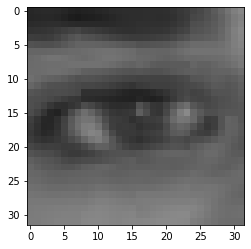

In [ ]:
#display an image in the training dataset
display_img(train_set,1535)

In [ ]:
batch_size = 40
val_size   = 960 
train_size = len(train_set) - val_size 

train_data,val_data = random_split(train_set,[train_size,val_size])
print(f"Length of Train Data      : {len(train_data)}")
print(f"Length of Validation Data : {len(val_data)}")

#load the train and validation into batches.
train_dl = DataLoader(train_data, batch_size, shuffle = True, num_workers = 2, pin_memory = True)
val_dl   = DataLoader(val_data, 2*batch_size, num_workers = 2, pin_memory = True)

Length of Train Data      : 7360
Length of Validation Data : 960


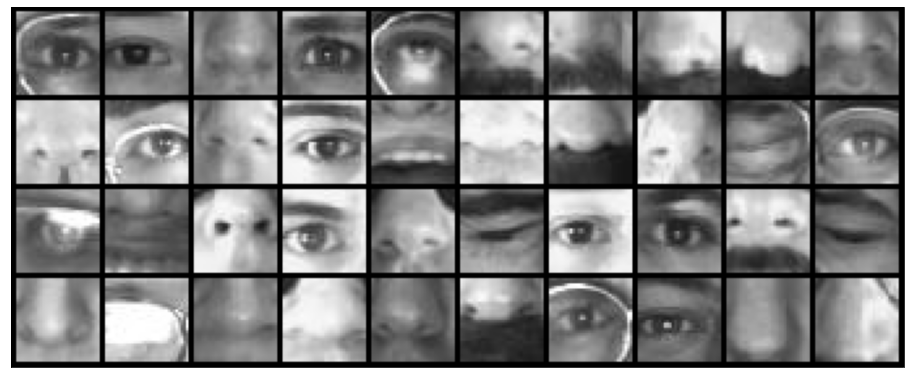

In [ ]:
show_batch(train_dl,nrow=10)

In [ ]:
class CNN_Classification(ImageClassificationBase):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            
            nn.Conv2d(in_channels=3, out_channels=4, kernel_size = 5, stride = 1, padding = 0),
            nn.ReLU(),
            nn.Conv2d(in_channels=4, out_channels=8, kernel_size = 5, stride = 6, padding = 0),
            nn.ReLU(),
            nn.MaxPool2d(2,2),            

            nn.Flatten(),
            nn.Linear(32,2)
        )
    
    def forward(self, xb):
        return self.network(xb)


In [ ]:
model =  CNN_Classification()
print(model)

CNN_Classification(
  (network): Sequential(
    (0): Conv2d(3, 4, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(4, 8, kernel_size=(5, 5), stride=(6, 6))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Flatten(start_dim=1, end_dim=-1)
    (6): Linear(in_features=32, out_features=2, bias=True)
  )
)


In [ ]:
#fitting the model on training data and record the result after each epoch
num_epochs = 50
opt_func   = torch.optim.Adam
lr         =  0.005
history    = fit(num_epochs, lr, model, train_dl, val_dl, opt_func)

Epoch    Train-Loss   Val-Loss    Val-Acc   Best    Time [sec]
------------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


    0      0.1816      0.0782      0.9729    ***       4.4 
    1      0.0697      0.0630      0.9740    ***       4.0 
    2      0.0406      0.0439      0.9875    ***       4.0 
    3      0.0400      0.0239      0.9917    ***       4.0 
    4      0.0281      0.0353      0.9854              4.0 
    5      0.0223      0.0631      0.9760              4.1 
    6      0.0236      0.0212      0.9917              4.0 
    7      0.0168      0.0112      0.9969    ***       4.0 
    8      0.0168      0.0102      0.9969              4.0 
    9      0.0219      0.0294      0.9885              4.1 
   10      0.0195      0.0247      0.9917              4.1 
   11      0.0201      0.0199      0.9927              4.0 
   12      0.0169      0.0142      0.9948              4.0 
   13      0.0127      0.0324      0.9927              4.0 
   14      0.0204      0.0328      0.9875              4.0 
   15      0.0239      0.0415      0.9865              4.1 
   16      0.0138      0.0102      0.997

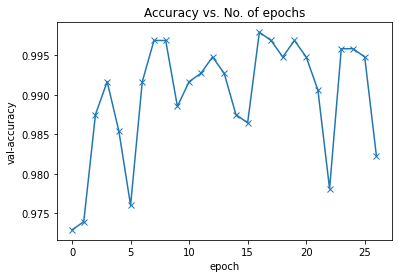

In [ ]:
plot_accuracies(history)

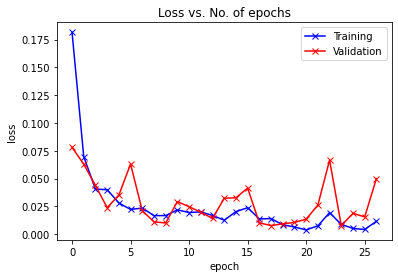

In [ ]:
plot_losses(history)

In [ ]:
model = load_model(CNN_Classification,'best_model.pt')

best_model.pt loaded.


In [ ]:
ytest = get_labels(model,test_set)
ypred = get_prediction(model,test_set)

acc   = accuracy_score(ytest,ypred) 
C     = confusion_matrix(ytest,ypred)

print('Performance on Testing subset:')
print('Accuracy:')
print(acc)
print(' ')
print('Confusion Matrix = ')
print(C)

Performance on Testing subset:
Accuracy:
0.9908653846153846
 
Confusion Matrix = 
[[1022   18]
 [   1 1039]]


Confusion Matrix:
[[1022   18]
 [   1 1039]]
Accuracy = 99.09


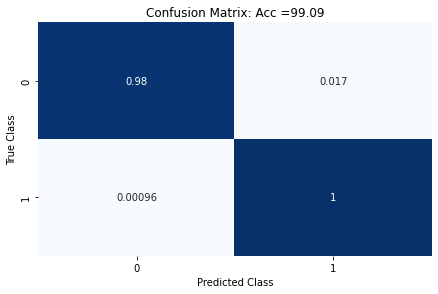

In [ ]:
print_confusion(ytest,ypred,show_heatmap=1,Cnorm=1040)

In [ ]:
C1,acc1 = performance(model,train_data,'Training')
C2,acc2 = performance(model,val_data  ,'Validation')
C3,acc3 = performance(model,test_set  ,'Testing')

Training Confusion Matrix = 
[[3681   10]
 [   4 3665]]
 
Training Accuracy = 0.9981
 
Validation Confusion Matrix = 
[[467   2]
 [  0 491]]
 
Validation Accuracy = 0.9979
 
Testing Confusion Matrix = 
[[1022   18]
 [   1 1039]]
 
Testing Accuracy = 0.9909
 
